In [10]:
%matplotlib inline
from matplotlib.pyplot import figure

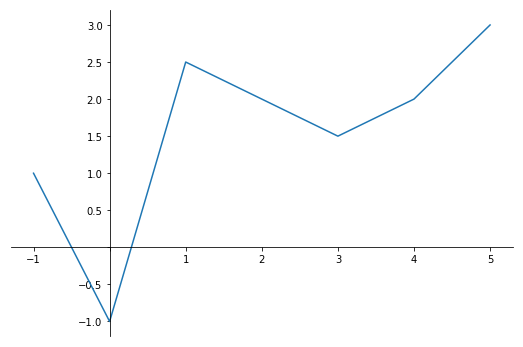

In [17]:
fig = figure(figsize=(9,6))
ax = fig.gca()

#ax.axes.get_xaxis().set_visible(False)
#ax.axes.get_yaxis().set_visible(False)

ax.axes.spines["top"].set_color("none")
ax.axes.spines["right"].set_color("none")
ax.tick_params(top="off", right="off")

ax.axes.spines["left"].set_position("zero")
ax.axes.spines["bottom"].set_position("zero")

ax.plot([-1, 0, 1, 2, 3, 4, 5], [1, -1, 2.5, 2, 1.5, 2, 3])
fig.canvas.draw()

labels = ax.xaxis.get_ticklabels()
#ticklabels[0].set_visible(False)
for label in labels:
    if label.get_text() == '0' or label.get_text() == '0.0':
        label.set_visible(False)
        
labels = ax.yaxis.get_ticklabels()
#ticklabels[0].set_visible(False)
for label in labels:
    if label.get_text() == '0' or label.get_text() == '0.0':
        label.set_visible(False)

In [18]:
ticklabels[2].get_text() == '1'

NameError: name 'ticklabels' is not defined

In [19]:
float('0.0')

0.0

In [7]:
def graficar(xs, ys, cursores_x={}, cursores_y={}, tamaño=(9, 6), imprimir_etiquetas=True):
    
    def imprimir_cursores(cursores, margenes, eje, axis, δ):
        etiquetas = cursores.keys()
        if eje is "x":
            for etiqueta in etiquetas:
                valor = cursores[etiqueta]
                axis.plot([valor, valor], [margenes[0], margenes[1]], '--r')
                axis.text(valor, -δ, etiqueta, color='red')
        if eje is "y":
            for etiqueta in etiquetas:
                valor = cursores[etiqueta]
                axis.plot([margenes[0], margenes[1]], [valor, valor], '--r')
                axis.text(-10*δ, valor, etiqueta, horizontalalignment="right", color='red')
                
    from matplotlib.pyplot import figure
    from matplotlib import rc
    #rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
    rc('font',**{'family':'serif','serif':['Palatino'], 'size':14.0})
    rc('text', usetex=True)
    
    δx = 0.01*abs(max(xs) - min(xs))
    δy = 0.01*abs(max(ys) - min(ys))
    
    margenes_x = [min(xs) - δx, max(xs) + δx]
    margenes_y = [min(ys) - δy, max(ys) + δy]
    
    fig = figure(figsize=tamaño)
    ax = fig.gca()

    ax.axes.spines["top"].set_color("none")
    ax.axes.spines["right"].set_color("none")
    ax.tick_params(top="off", right="off")

    ax.axes.spines["left"].set_position("zero")
    ax.axes.spines["left"].set_axisline_style("->")
    ax.axes.spines["bottom"].set_position("zero")
    ax.spines["left"].set_linewidth(2)
    ax.spines["bottom"].set_linewidth(2)

    ax.plot(xs, ys, 'k')
    ax.axes.set_xlim(margenes_x[0], margenes_x[1])
    ax.axes.set_ylim(margenes_y[0], margenes_y[1])
    fig.canvas.draw()
    
    #for direction in ["xzero", "yzero"]:
    #    ax.axis[direction].set_visible(True)
    #    ax.axis[direction].set_axisline_style("->")
    
    if imprimir_etiquetas == False:
        ax.axes.get_xaxis().set_ticks([])
        ax.axes.get_yaxis().set_ticks([])
        
    if len(cursores_x) > 0:
        imprimir_cursores(cursores_x, margenes_y, "x", ax, δx)
    if len(cursores_y) > 0:
        imprimir_cursores(cursores_y, margenes_x, "y", ax, δy)

    labels = ax.xaxis.get_ticklabels()
    for label in labels:
        if label.get_text() == r'$0$' or label.get_text() == r'$0.0$':
            label.set_visible(False)

    labels = ax.yaxis.get_ticklabels()
    for label in labels:
        if label.get_text() == r'$0$' or label.get_text() == r'$0.0$':
            label.set_visible(False)
            
    return ax

AttributeError: 'Spine' object has no attribute 'set_axisline_style'

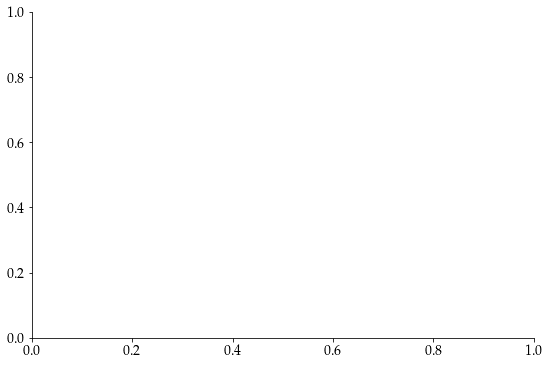

In [8]:
graficar([1, 2, 3], [-1,0,1], imprimir_etiquetas=False);

In [3]:
from scipy.integrate import odeint

In [4]:
from numpy import sin, linspace, exp

In [5]:
f = lambda x, t: -x

t0, tf = 0, 5
n = 10

ts1 = linspace(t0, tf, n)
ys1 = exp(-ts1)
ts2 = linspace(t0, tf, n)
#ys2 = odeint(f, 1, ts2)

Δt = (tf - t0)/n
ys2 = []
for t in ts2:
    if ys2 == []:
        ys2.append(1)
    else:
        ys2.append(ys2[-1] + f(ys2[-1], t)*Δt)


TypeError: 'method' object is not subscriptable

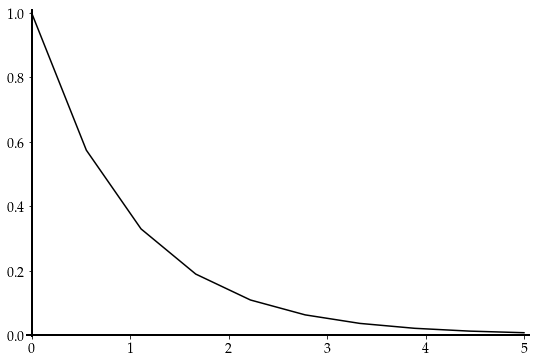

In [6]:
ax2 = graficar(ts1, ys1)

ax2.plot(ts2, ys2, 'r')
ax2.plot([-1000, 1000], [ys2[1], ys2[1]], "--r")
ax2.plot([-1000, 1000], [ys2[2], ys2[2]], "--r")
ax2.text(-0.35, 0.0 + ys2[1], r'$y_{i}$', color='red')
ax2.text(-0.35, 0.0 + ys2[2], r'$y_{i+1}$', color='red');


ax2.plot([ts2[1], ts2[1]], [-1000, 1000], "--r")
ax2.plot([ts2[2], ts2[2]], [-1000, 1000], "--r")
ax2.text(0.6, -0.1 , r'$x_{i}$', color='red')
ax2.text(1.2, -0.1 , r'$x_{i+1}$', color='red');
ax2.text?

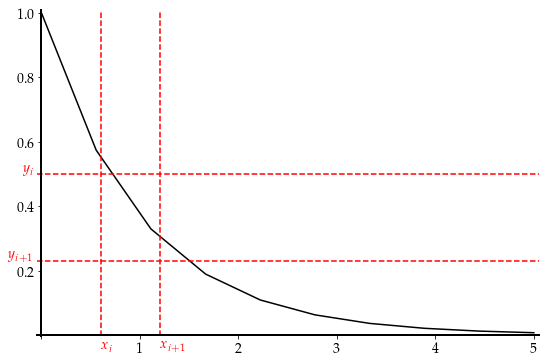

In [110]:
ax2 = graficar(ts1, ys1, {r"$x_i$":0.6, r"$x_{i+1}$":1.2}, {r"$y_i$":0.5, r"$y_{i+1}$":0.23})

In [111]:
from control import tf, step

In [112]:
G = tf([1],[1, 1, 1])
t, y = step(G)

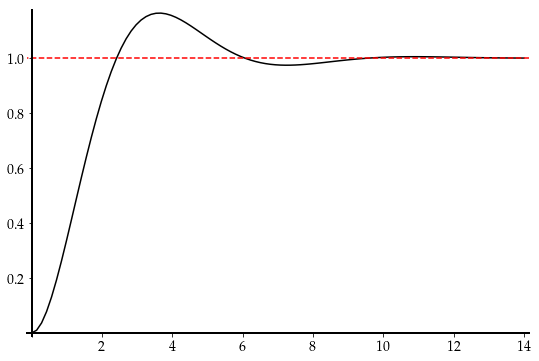

In [113]:
ax2 = graficar(y, t)

#ax2.plot(t, y, 'r')
ax2.plot([-1, 1000], [1, 1], "--r")
#ax2.plot([-1000, 1000], [ys2[2], ys2[2]], "--r")
#ax2.text(-0.35, 0.0 + ys2[1], r'$y_{i}$', color='red')
#ax2.text(-0.35, 0.0 + ys2[2], r'$y_{i+1}$', color='red');


#ax2.plot([ts2[1], ts2[1]], [-1000, 1000], "--r")
#ax2.plot([ts2[2], ts2[2]], [-1000, 1000], "--r")
#ax2.text(0.6, -0.1 , r'$x_{i}$', color='red')
#ax2.text(1.2, -0.1 , r'$x_{i+1}$', color='red');

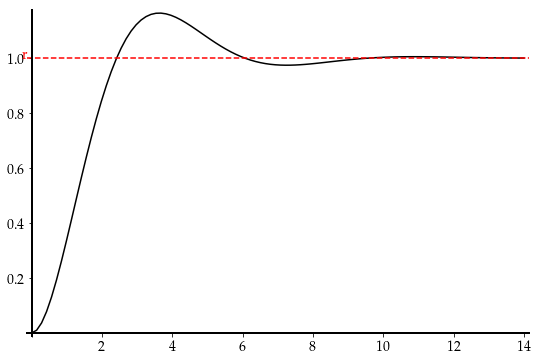

In [115]:
ax2 = graficar(y, t, cursores_y={r"r":1})

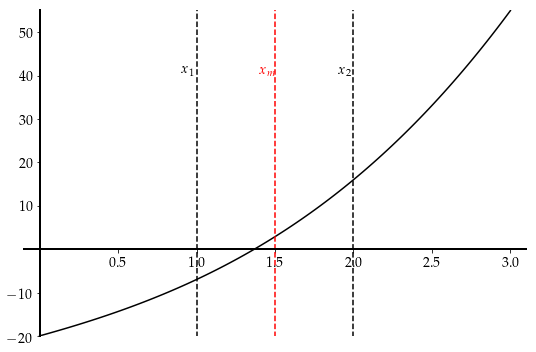

In [36]:
f = lambda x: x**3 + 2*x**2 + 10*x - 20

xs = linspace(0, 3, 100)
ys = f(xs)

ax1 = graficar(xs, ys)
ax1.plot([1, 1], [-1000, 1000], '--k')
ax1.plot([2, 2], [-1000, 1000], '--k')
ax1.plot([1.5, 1.5], [-1000, 1000], '--r')
ax1.text(0.9, 40, r'$x_1$')
ax1.text(1.9, 40, r'$x_2$')
ax1.text(1.4, 40, r'$x_m$', color='red');

In [37]:
tam=(6, 6)
tls=True

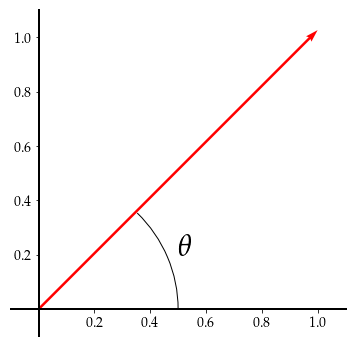

In [39]:
%matplotlib inline
from matplotlib.pyplot import figure
from matplotlib import rc
from matplotlib.patches import Arc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
rc('font',**{'family':'serif','serif':['Palatino'], 'size':14.0})
#rc('font', **{'family':'cursive', 'cursive':['Zapf Chancery'], 'size':14.0})
#rc('font', **{'family':'fantasy', 'fantasy':['Humor Sans'], 'size':14.0})
rc('text', usetex=True)

fig = figure(figsize=tam)
ax = fig.gca()

#ax.axes.get_xaxis().set_visible(False)
#ax.axes.get_yaxis().set_visible(False)

ax.axes.spines["top"].set_color("none")
ax.axes.spines["right"].set_color("none")
ax.tick_params(top="off", right="off")

ax.axes.spines["left"].set_position("zero")
ax.axes.spines["bottom"].set_position("zero")
ax.spines["left"].set_linewidth(2)
ax.spines["bottom"].set_linewidth(2)

#ax.plot(xs, ys, 'k')
ax.axes.set_xlim(-0.1, 1 + 0.1)
ax.axes.set_ylim(-0.1, 1 + 0.1)

elpse = Arc([0, 0], 1, 1, 0, 0, 45)
ax.add_patch(elpse)

ax.quiver([0], [0], [1], [1], scale=1.2, color="r");
#ax.quiver?

fig.canvas.draw()
if tls == False:
    ax.axes.get_xaxis().set_ticks([])
    ax.axes.get_yaxis().set_ticks([])

labels = ax.xaxis.get_ticklabels()
#ticklabels[0].set_visible(False)
for label in labels:
    if label.get_text() == r'$0$' or label.get_text() == r'$0.0$':
        label.set_visible(False)

labels = ax.yaxis.get_ticklabels()
#ticklabels[0].set_visible(False)
for label in labels:
    if label.get_text() == r'$0$' or label.get_text() == r'$0.0$':
        label.set_visible(False)
        
ax.text(0.5, 0.2, r'$\theta$', size=30);

In [40]:
prueba = {r"$x_i$":1}
p = prueba.keys()

In [41]:
for c in p:
    print(c, prueba[c])

$x_i$ 1


In [15]:
len(prueba)

1

In [12]:
%matplotlib inline

ValueError: v must contain [xmin xmax ymin ymax]

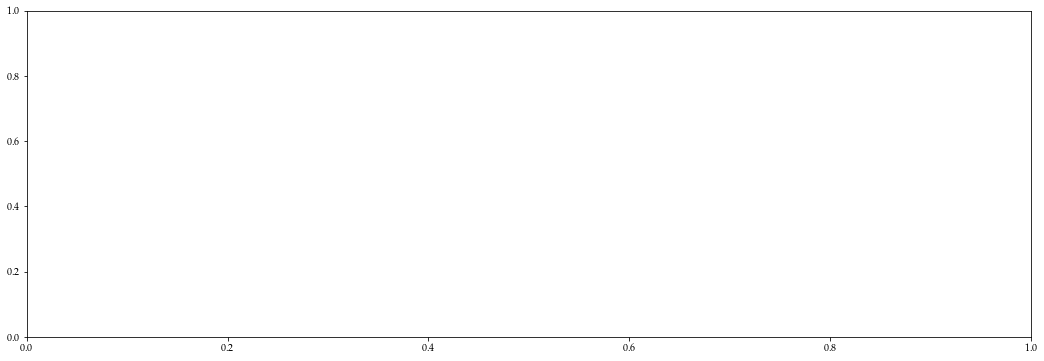

In [31]:
fig = figure(figsize=(18,6))
ax = fig.gca()
ax.axis(["xzero"])